# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

In [2]:
#!gunzip SUSY.csv.gz

In [3]:
ls -lh

total 2.3G
-rw-r--r-- 1 lmn4121 lmn4121 1.2M Mar 29 12:12 Lab.7.ipynb
-rw-r--r-- 1 lmn4121 lmn4121 2.3G Mar 20 21:02 SUSY.csv
drwxr-xr-x 2 lmn4121 lmn4121 4.0K Mar 29 10:20 __pycache__/
-rw-r--r-- 1 lmn4121 lmn4121  97K Mar 29 10:07 tabulate.py


The data is provided as a comma separated file.

In [4]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [5]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [6]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [7]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [8]:
FeatureNames

['MET_rel',
 'dPhi_r_b',
 'M_TR_2',
 'M_Delta_R',
 'M_R',
 'S_R',
 'cos_theta_r1',
 'MT2',
 'axial_MET',
 'R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [10]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [11]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [12]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


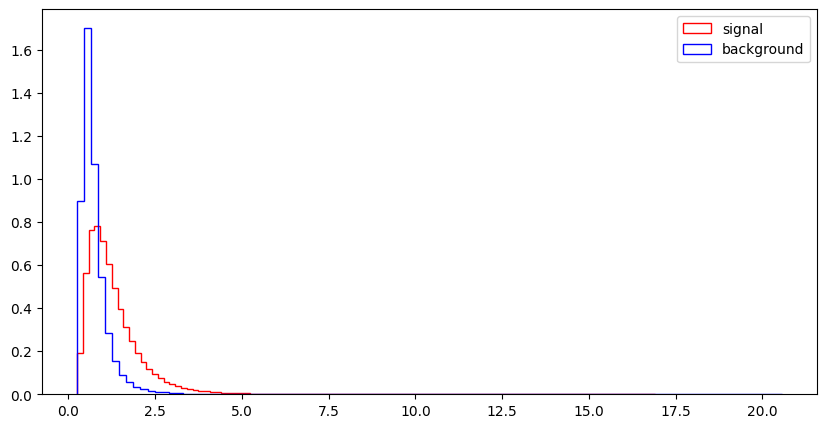

l_1_eta


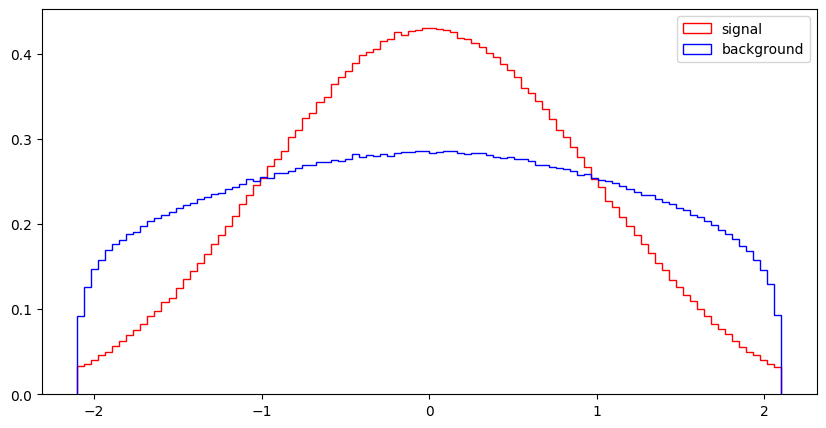

l_1_phi


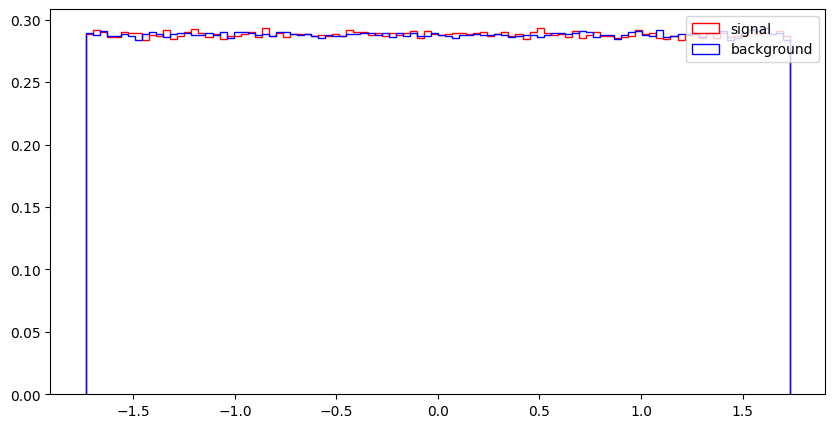

l_2_pT


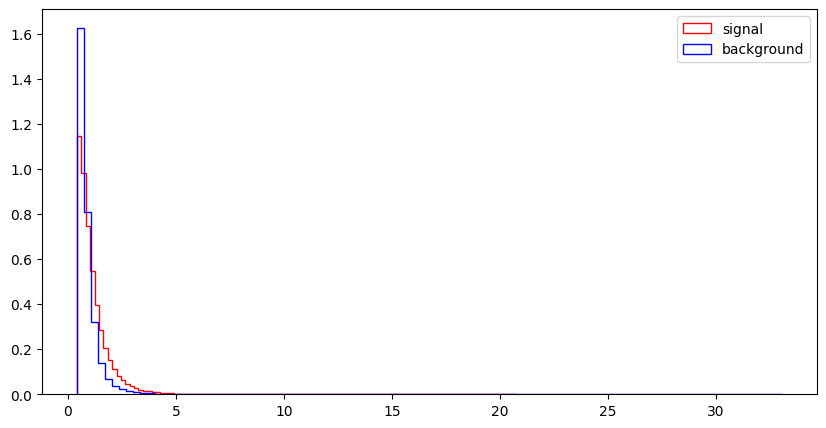

l_2_eta


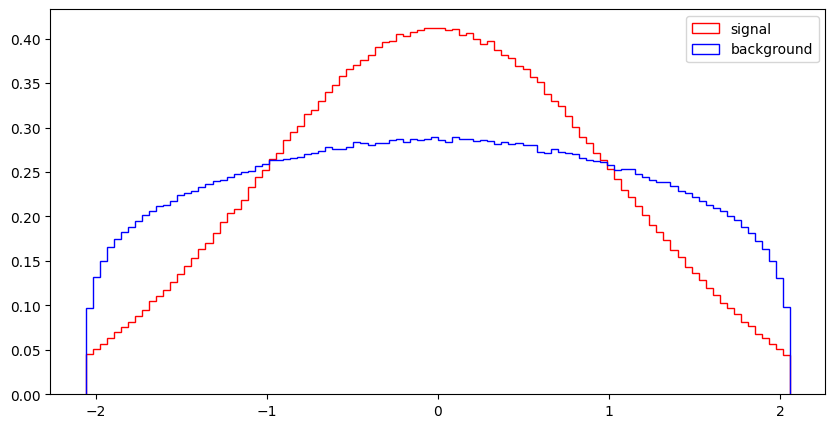

l_2_phi


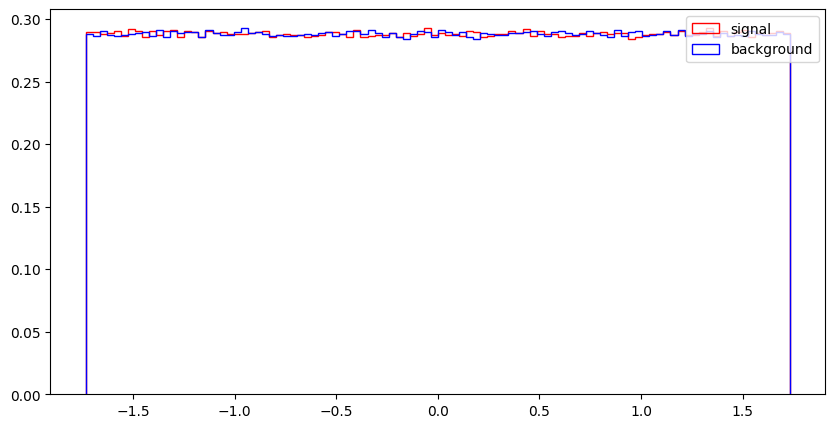

MET


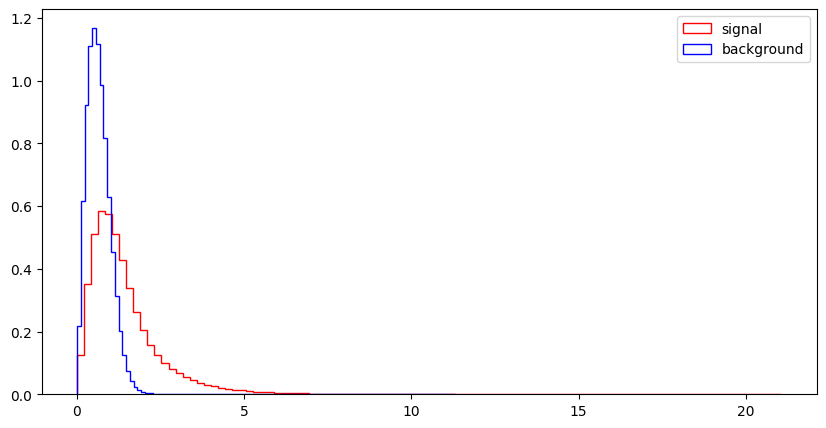

MET_phi


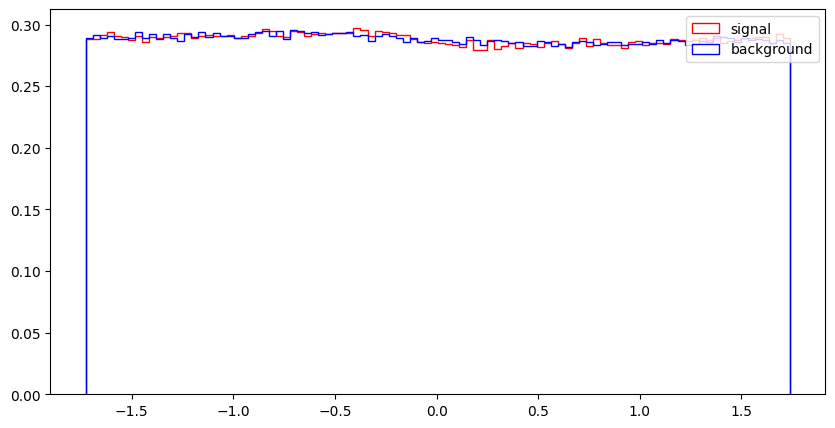

MET_rel


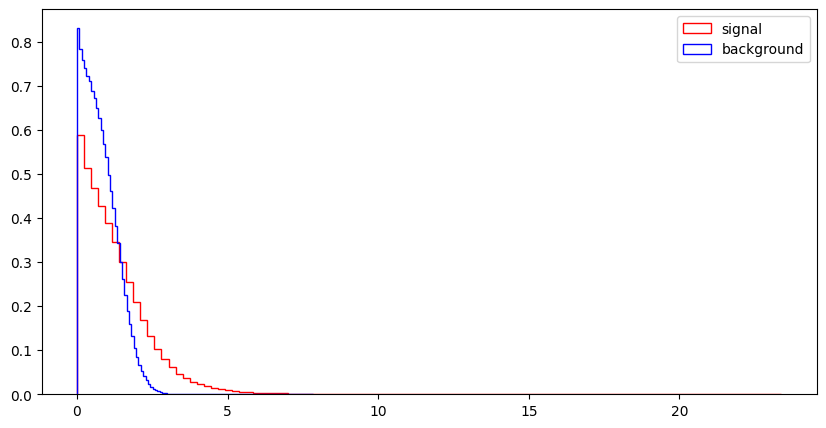

axial_MET


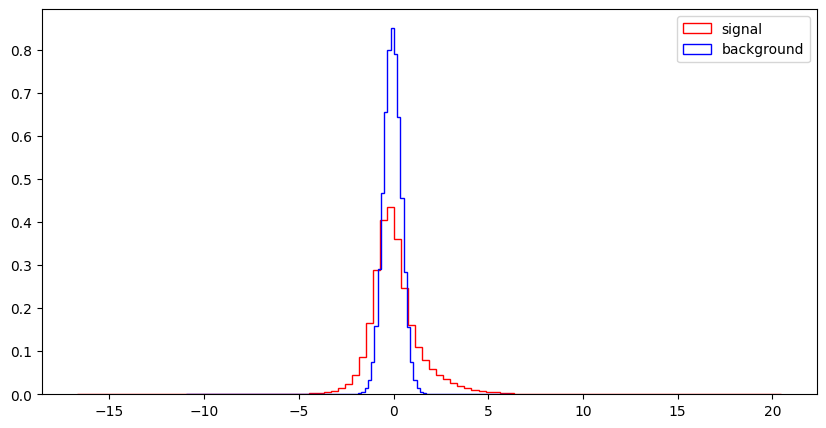

M_R


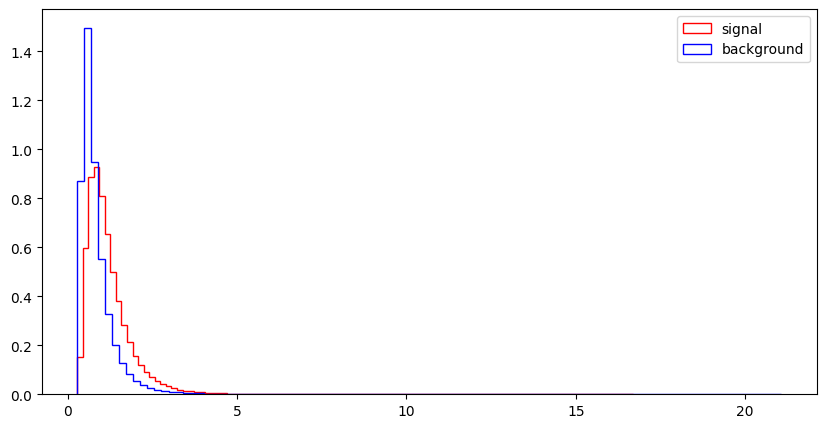

M_TR_2


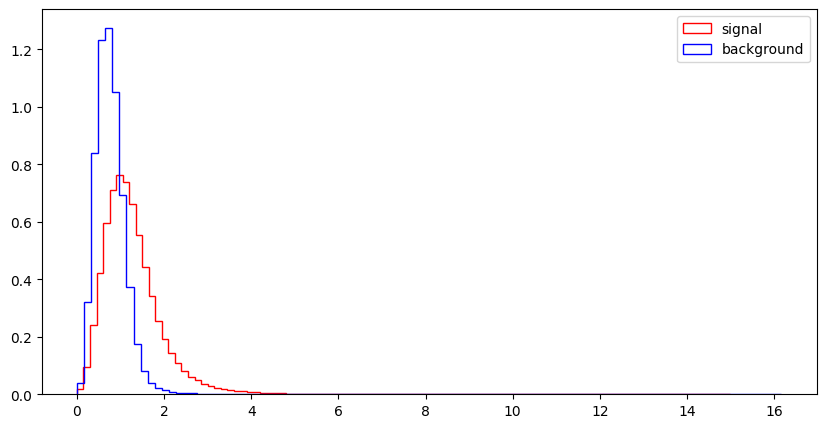

R


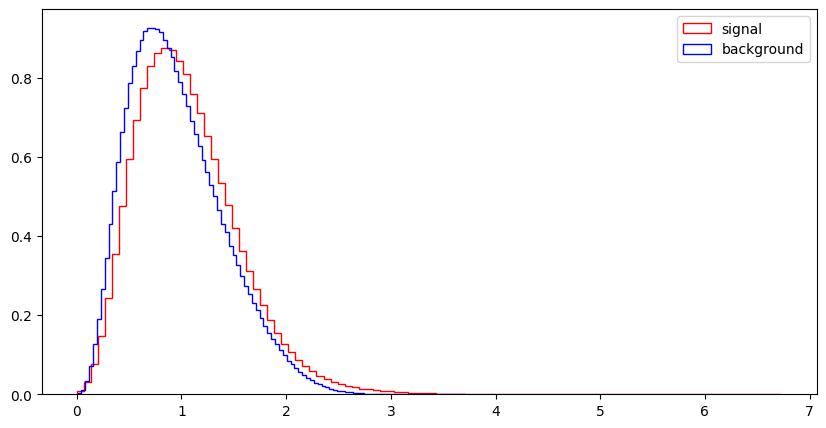

MT2


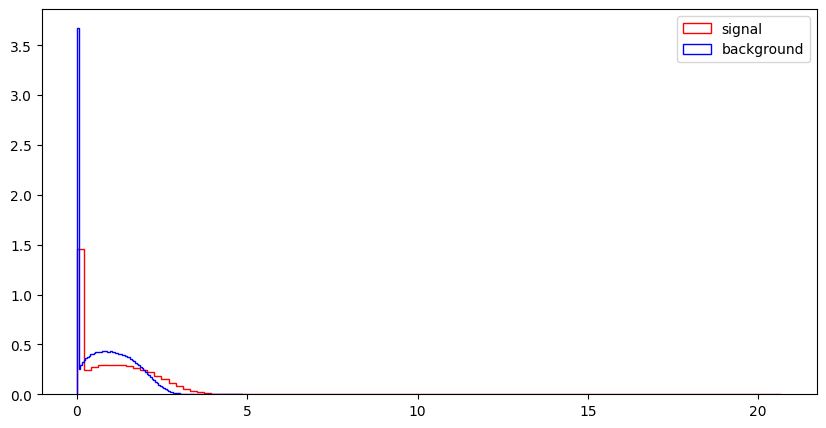

S_R


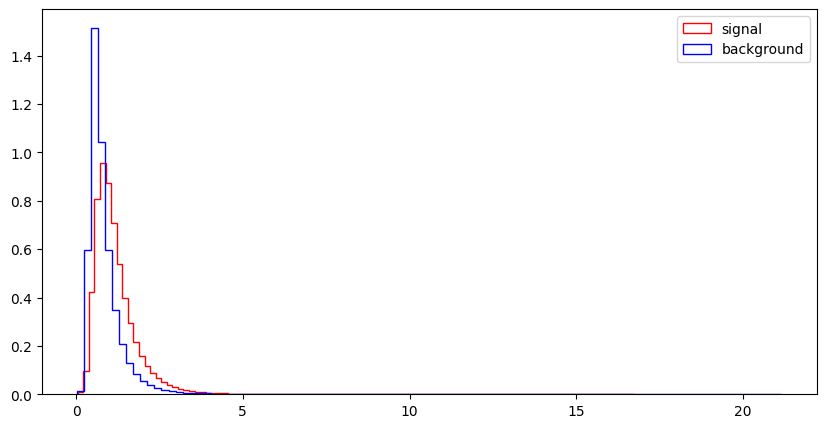

M_Delta_R


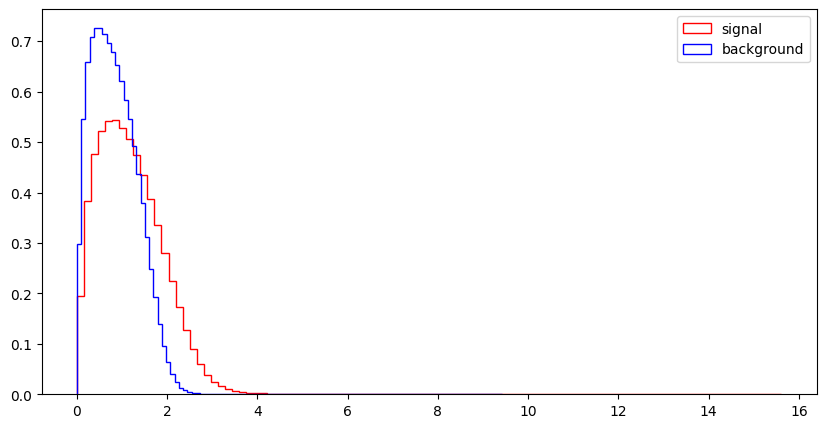

dPhi_r_b


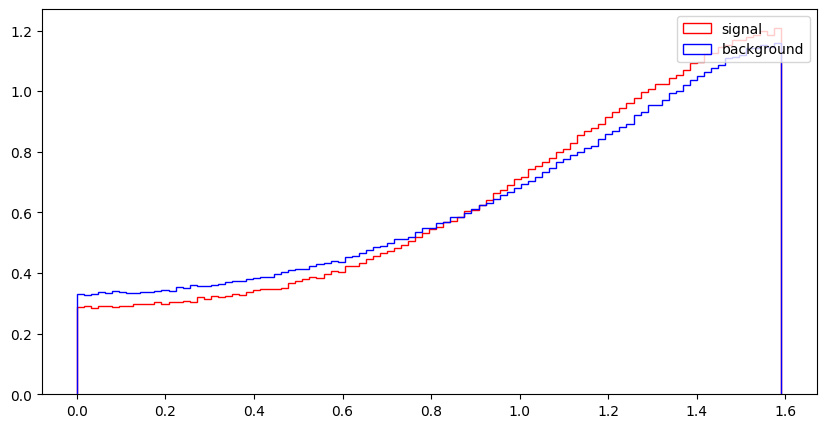

cos_theta_r1


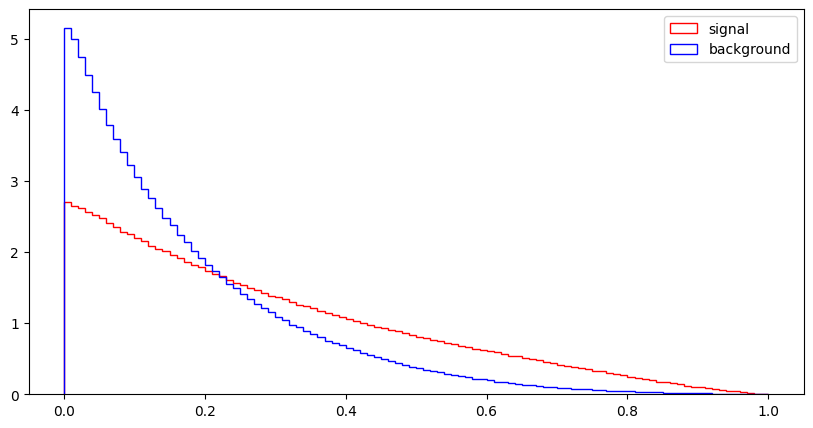

In [13]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

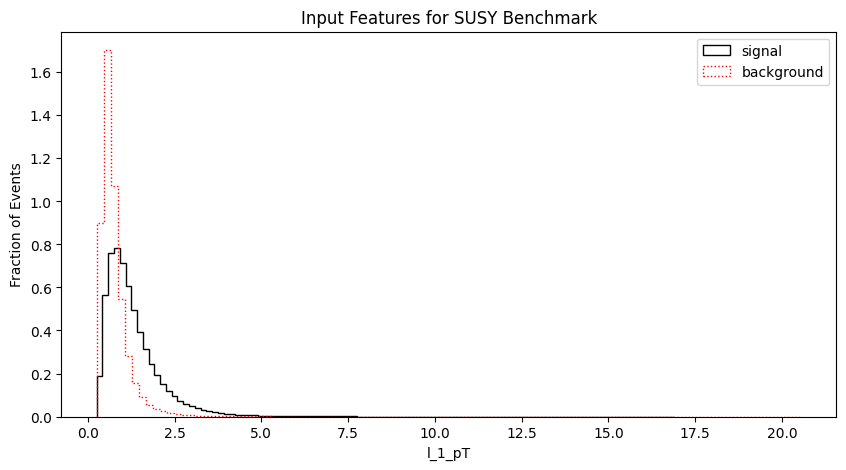

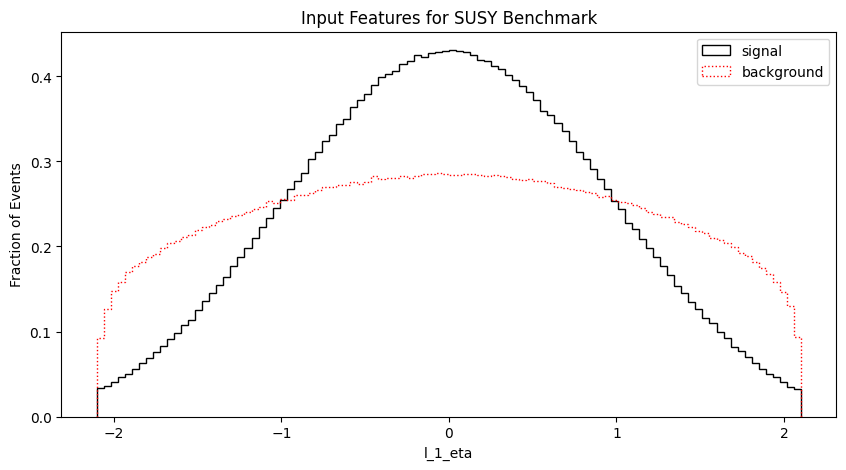

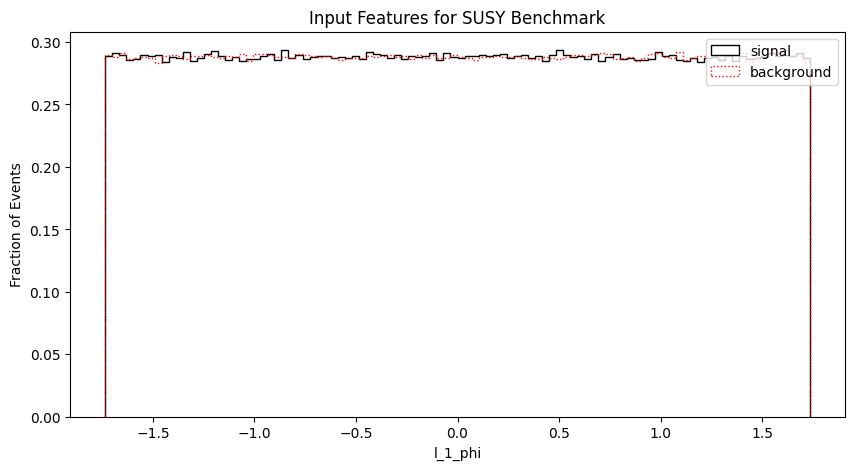

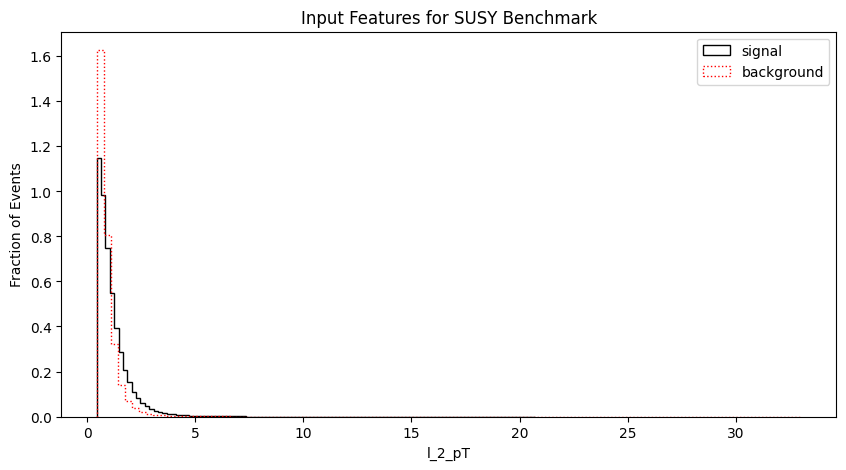

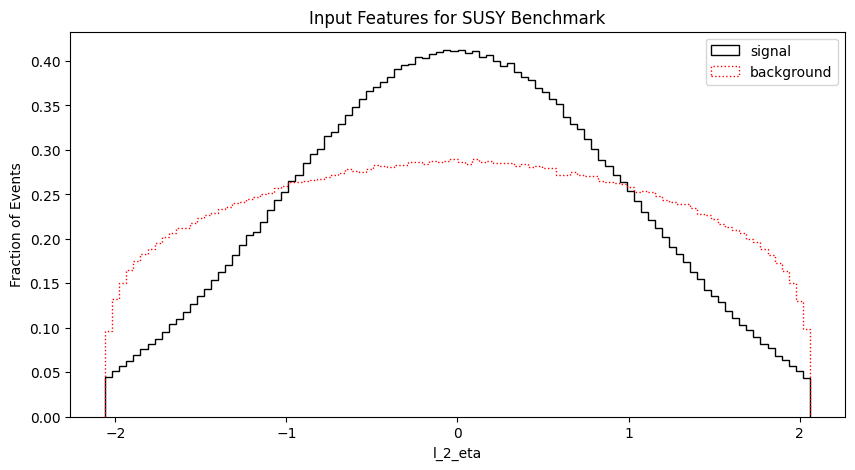

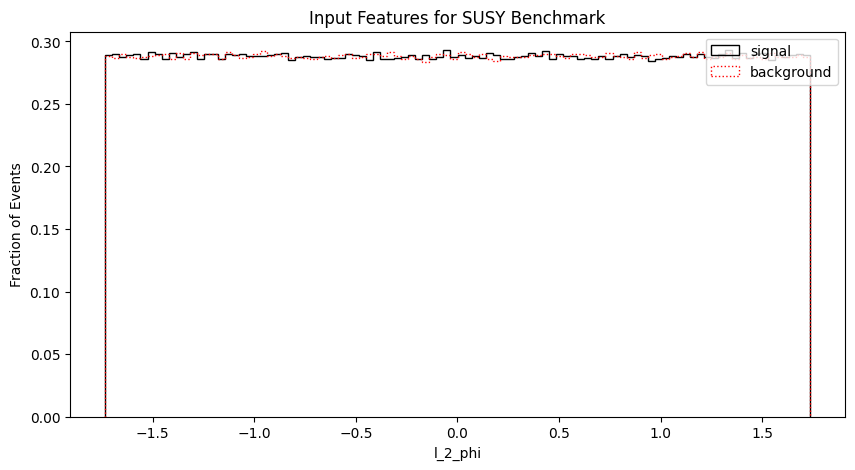

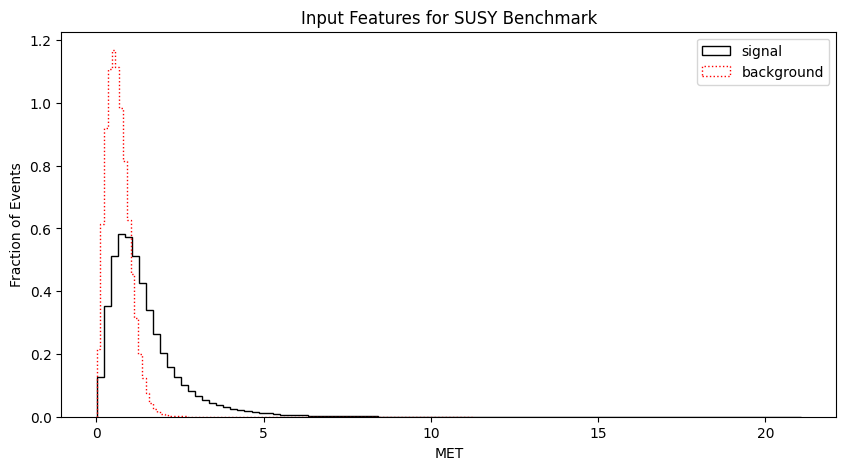

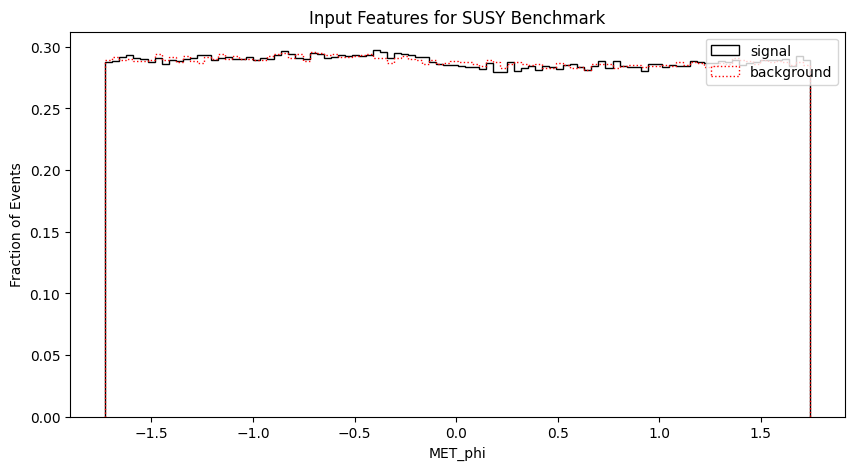

In [14]:
# Figure 5 (low-level)
for var in RawNames:
    plt.figure(figsize=(10,5))
    plt.title('Input Features for SUSY Benchmark')
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="red", label="background",density=1, stacked=True, linestyle='dotted')
    plt.legend(loc='upper right')
    plt.xlabel(var)
    plt.ylabel('Fraction of Events')
plt.show()

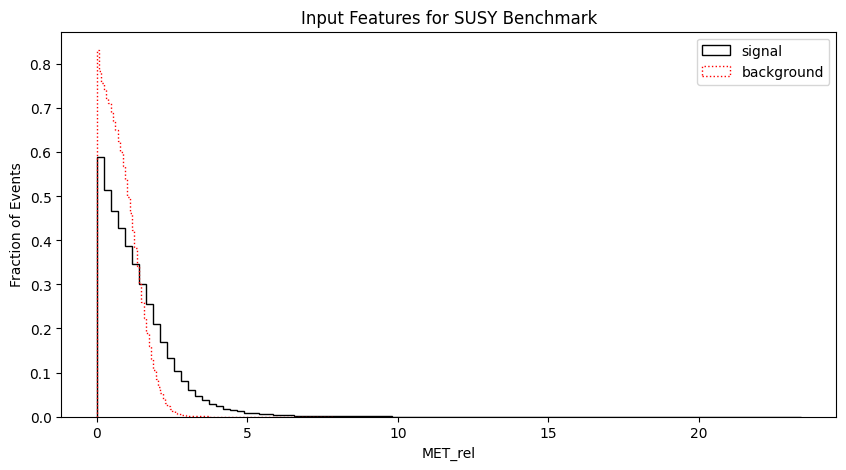

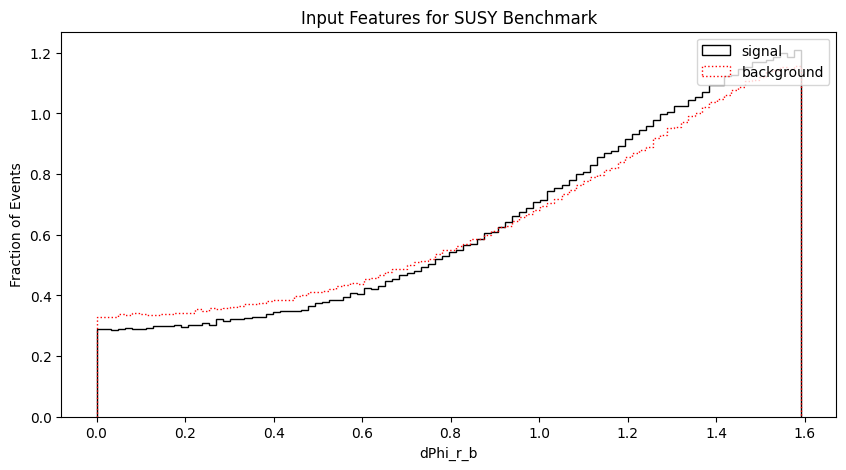

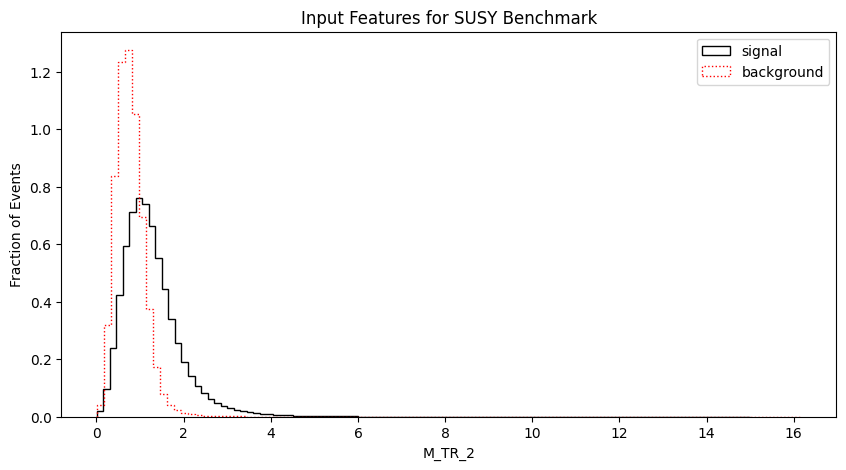

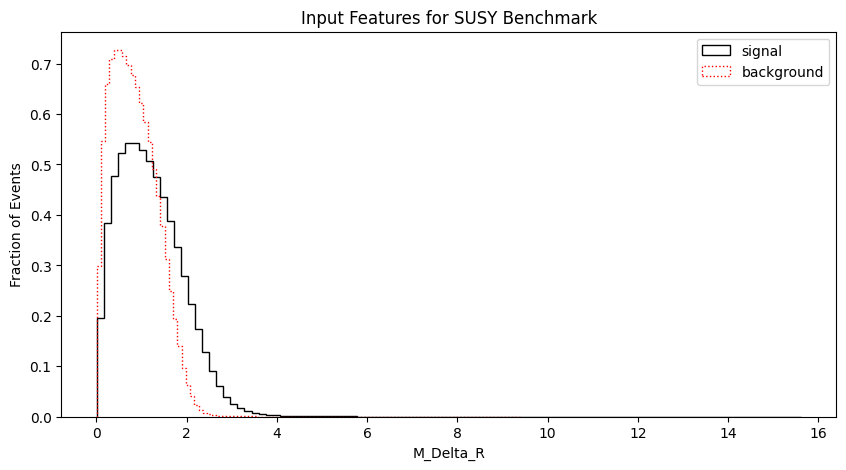

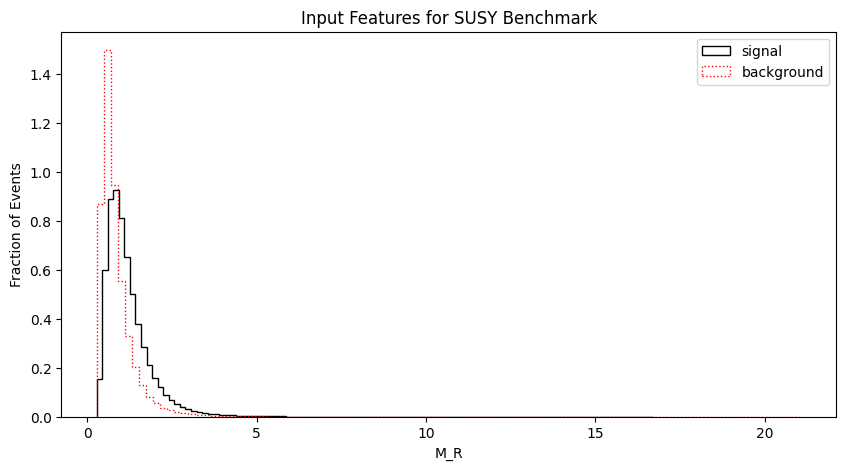

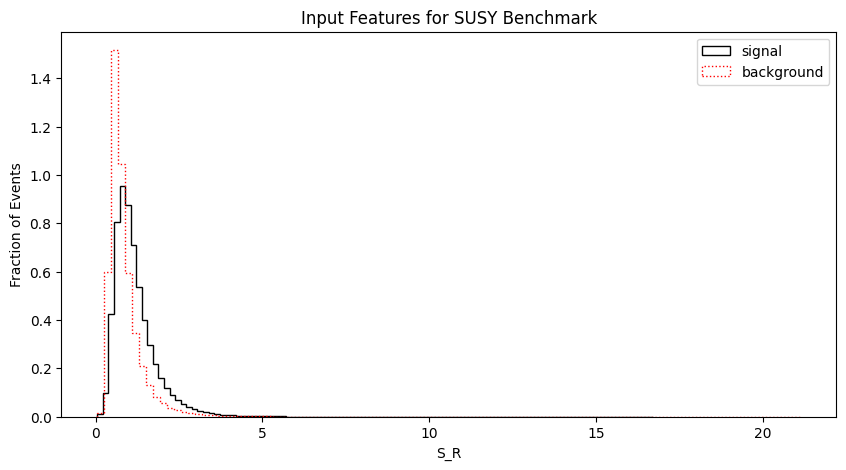

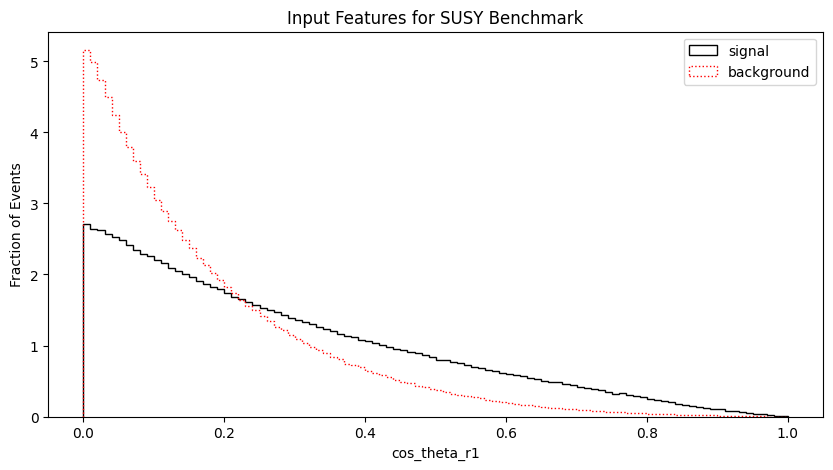

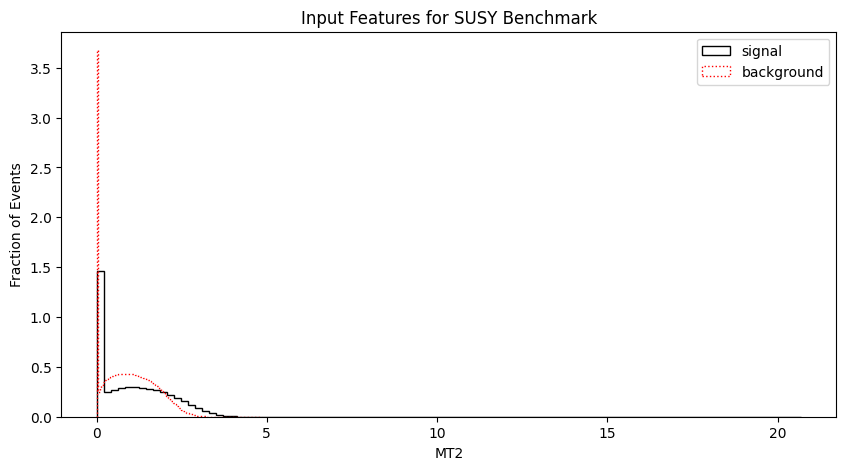

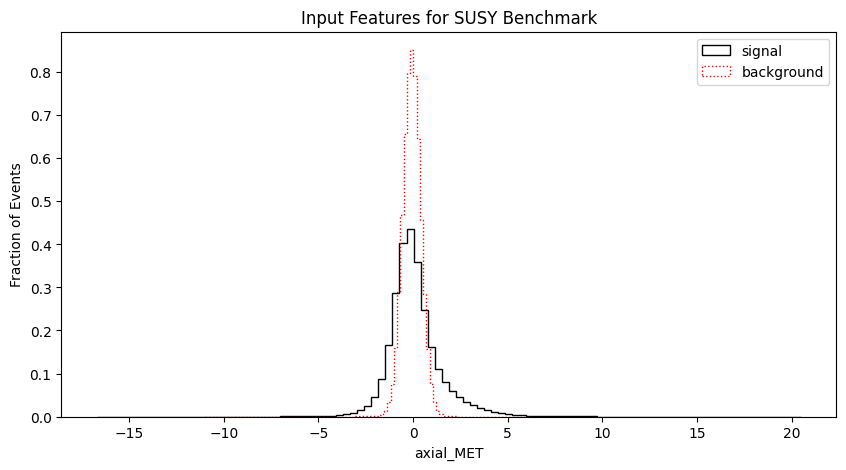

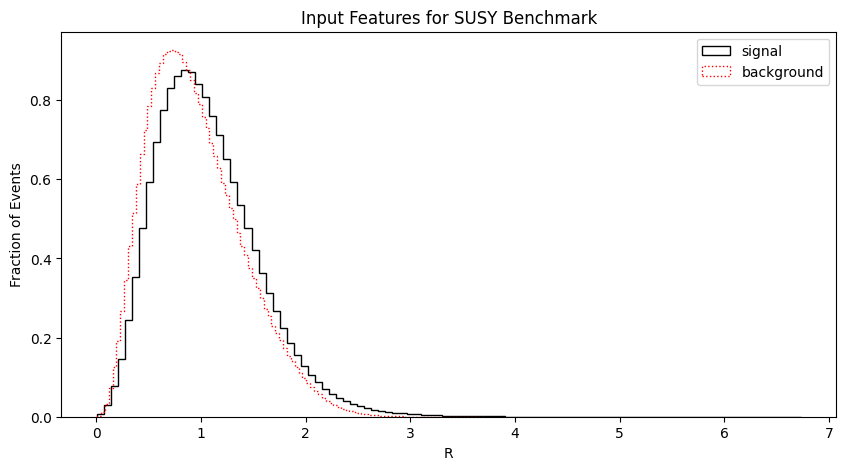

In [15]:
# Figure 6 (High-level)
for var in FeatureNames:
    plt.figure(figsize=(10,5))
    plt.title('Input Features for SUSY Benchmark')
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="red", label="background",density=1, stacked=True, linestyle='dotted')
    plt.legend(loc='upper right')
    plt.xlabel(var)
    plt.ylabel('Fraction of Events')
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [16]:
def compare_distributions(df,column_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label=label)

    _=plt.legend()
    
def compare_scatter(df,x_var_name,y_var_name,selections,make_legend=True) :
    for label,selection in selections.items():   
        _=plt.scatter(df[selection][x_var_name],df[selection][y_var_name],label=label)

    _=plt.xlabel(x_var_name)
    _=plt.ylabel(y_var_name)

    if make_legend:
        _=plt.legend()
#compare_scatter(df_small,'l_1_pT','l_2_pT',selection_dict)

#def compare_hist(df,x_var_name,y_var_name)

In [17]:
def compare_hist(df,var1,var2):
    sig=df[df.signal==1]
    bkg=df[df.signal==0]
    
    plt.hist(np.array(df_sig[var1]),bins=100,histtype="step", color="black",label=var1,density=1, stacked=True)
    plt.hist(np.array(df_sig[var2]),bins=100,histtype="step", color="red", label=var2,density=1, stacked=True)
    plt.hist(np.array(df_bkg[var1]),bins=100,histtype="step", color="black",density=1, stacked=True, linestyle='dotted')
    plt.hist(np.array(df_bkg[var2]),bins=100,histtype="step", color="red",density=1, stacked=True, linestyle='dotted')
    plt.legend(loc='upper right')

#compare_hist(df,'l_1_pT','l_2_pT')

In [18]:
def pairplot(df, columns):
    df_small=df.head(10000)
    selection_dict={"Background":df_small["signal"]==0.,"Signal":df_small["signal"]!=0}
    
    n_columns=len(columns)
    plt.figure(figsize=(15,15))

    plot_i=0
    for i,x_var_name in enumerate(columns):
        for j,y_var_name in enumerate(columns):
            plot_i+=1
            plt.subplot(n_columns,n_columns,plot_i)
            if i==j:
                compare_distributions(df_small,x_var_name,
                         selection_dict,
                         alpha=0.5,
                         density=1,
                         bins=50,
                         )
            else:
                #compare_scatter(df_small,x_var_name,y_var_name,selection_dict,make_legend=make_legend)
                compare_hist(df_small,x_var_name,y_var_name)

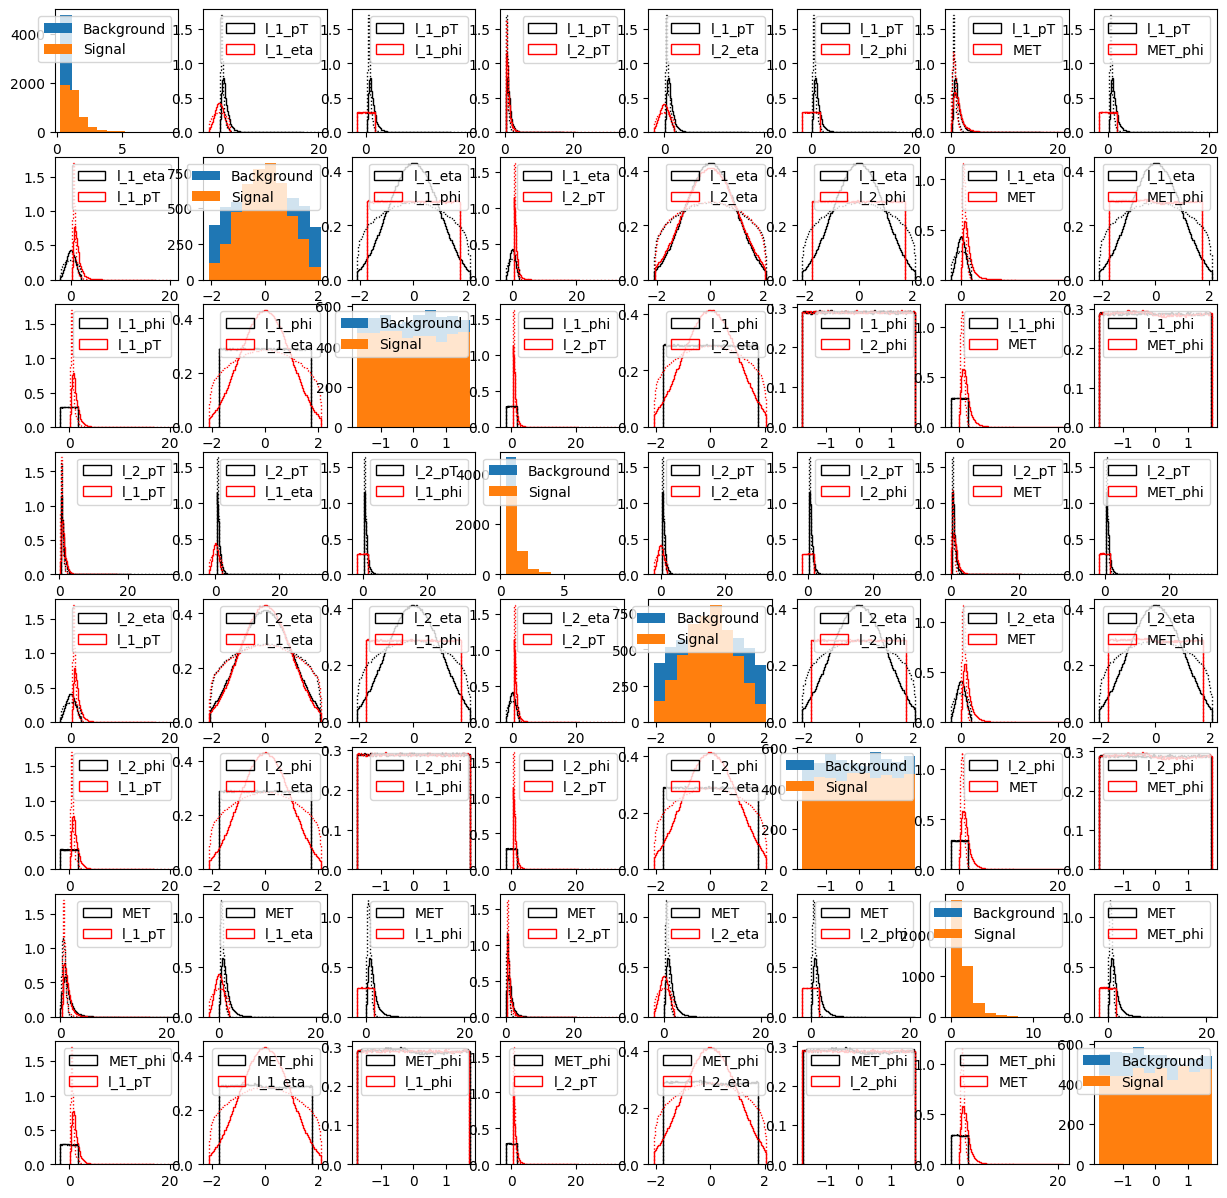

In [84]:
# Low_level Features
pairplot(df, RawNames)

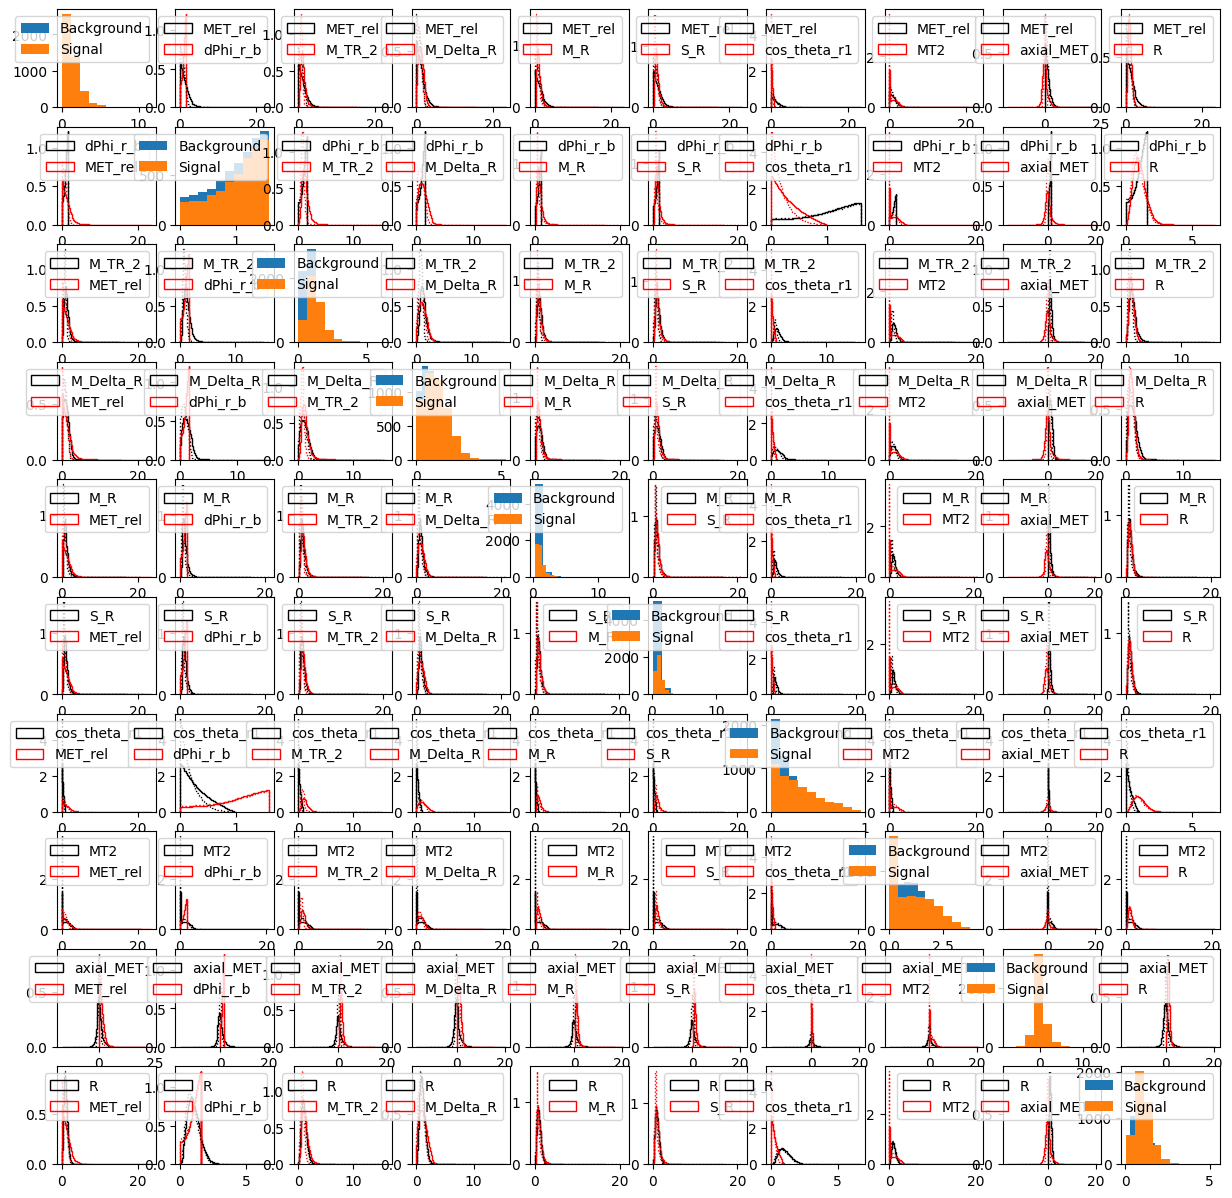

In [85]:
# High_level Features
pairplot(df, FeatureNames)

In [21]:
# Note: (Part B) a subset of the data was used instead of the full data set to speed up the process

# Note: Dotted lines represent the background

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [22]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [79]:
def relation_mat(df, columns, type='cov'):
    if type=='cov':
        table=np.cov(df, rowvar=False).tolist()
        for i in range(len(table)): table[i].insert(0,columns[i])
        return tabulate.tabulate(table, tablefmt='html', headers=columns)
    elif type=='corrcoef':
        table=np.corrcoef(df, rowvar=False).tolist()
        for i in range(len(table)): table[i].insert(0,columns[i])
        return tabulate.tabulate(table, tablefmt='html', headers=columns)
    else: 
        print('Invalid Input')

In [ ]:
df_small=df.head(10000)
df_high=df_small[FeatureNames]
df_low=df_small[RawNames]

In [80]:
# Covariance for low-level features
relation_mat(df_low, RawNames, type='cov')

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.460858,-0.00418887,-0.00137079,0.294436,0.00958541,0.00381466,0.240183,-0.00352828
l_1_eta,-0.00418887,1.00532,0.00176701,-0.0078539,0.401749,-0.00991886,-0.00405443,-0.00487734
l_1_phi,-0.00137079,0.00176701,1.00827,0.00638461,0.00117765,-0.26708,-0.0106857,-0.183609
l_2_pT,0.294436,-0.0078539,0.00638461,0.411645,0.00673714,-0.00860988,0.0887261,-0.00425625
l_2_eta,0.00958541,0.401749,0.00117765,0.00673714,1.00844,-0.00336057,0.00360387,-0.013826
l_2_phi,0.00381466,-0.00991886,-0.26708,-0.00860988,-0.00336057,0.99862,0.0052874,-0.033386
MET,0.240183,-0.00405443,-0.0106857,0.0887261,0.00360387,0.0052874,0.844474,0.0123674
MET_phi,-0.00352828,-0.00487734,-0.183609,-0.00425625,-0.013826,-0.033386,0.0123674,1.0035


In [81]:
# Correlation for low-level features
relation_mat(df_low, RawNames, type='corrcoef')

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.00615407,-0.00201094,0.676,0.0140606,0.00562306,0.385004,-0.00518827
l_1_eta,-0.00615407,1,0.00175508,-0.0122088,0.399006,-0.00989943,-0.00440033,-0.00485595
l_1_phi,-0.00201094,0.00175508,1,0.00991024,0.0011679,-0.266166,-0.0115803,-0.182535
l_2_pT,0.676,-0.0122088,0.00991024,1,0.0104566,-0.0134288,0.150486,-0.00662229
l_2_eta,0.0140606,0.399006,0.0011679,0.0104566,1,-0.0033488,0.00390528,-0.0137441
l_2_phi,0.00562306,-0.00989943,-0.266166,-0.0134288,-0.0033488,1,0.00575769,-0.0333508
MET,0.385004,-0.00440033,-0.0115803,0.150486,0.00390528,0.00575769,1,0.0134347
MET_phi,-0.00518827,-0.00485595,-0.182535,-0.00662229,-0.0137441,-0.0333508,0.0134347,1


In [82]:
# Covariance for high-level features
relation_mat(df_high, FeatureNames, type='cov')

,MET_rel,dPhi_r_b,M_TR_2,M_Delta_R,M_R,S_R,cos_theta_r1,MT2,axial_MET,R
MET_rel,0.798486,0.14972,0.306928,0.411801,0.0511766,0.090603,0.0554861,0.394666,-0.10336,0.247642
dPhi_r_b,0.14972,0.191528,0.0626079,0.0430602,-0.02221,0.00441796,0.00912135,0.019395,-0.0282134,0.0860049
M_TR_2,0.306928,0.0626079,0.343128,0.246363,0.213275,0.233243,0.0521526,0.185913,-0.180339,0.105649
M_Delta_R,0.411801,0.0430602,0.246363,0.388418,0.0814464,0.103416,0.0391529,0.419803,-0.219806,0.163815
M_R,0.0511766,-0.02221,0.213275,0.0814464,0.40185,0.389839,-0.0147809,-0.0338709,0.0234859,-0.112636
S_R,0.090603,0.00441796,0.233243,0.103416,0.389839,0.393243,-0.0108091,-0.00846702,-0.037946,-0.0820159
cos_theta_r1,0.0554861,0.00912135,0.0521526,0.0391529,-0.0147809,-0.0108091,0.0397094,0.044218,-0.0538087,0.0588578
MT2,0.394666,0.019395,0.185913,0.419803,-0.0338709,-0.00846702,0.044218,0.71726,-0.4669,0.231913
axial_MET,-0.10336,-0.0282134,-0.180339,-0.219806,0.0234859,-0.037946,-0.0538087,-0.4669,1.0909,-0.188792
R,0.247642,0.0860049,0.105649,0.163815,-0.112636,-0.0820159,0.0588578,0.231913,-0.188792,0.2244


In [83]:
# Correlation for high-level features
relation_mat(df_high, FeatureNames, type='corrcoef')

,MET_rel,dPhi_r_b,M_TR_2,M_Delta_R,M_R,S_R,cos_theta_r1,MT2,axial_MET,R
MET_rel,1,0.382852,0.586375,0.739441,0.0903453,0.161688,0.311604,0.521504,-0.110746,0.58503
dPhi_r_b,0.382852,1,0.244223,0.157874,-0.0800573,0.0160981,0.104592,0.0523281,-0.0617232,0.414855
M_TR_2,0.586375,0.244223,1,0.674836,0.574355,0.634966,0.446788,0.374751,-0.294761,0.380739
M_Delta_R,0.739441,0.157874,0.674836,1,0.206153,0.26461,0.315258,0.795349,-0.337674,0.554871
M_R,0.0903453,-0.0800573,0.574355,0.206153,1,0.98067,-0.117009,-0.0630895,0.0354718,-0.37509
S_R,0.161688,0.0160981,0.634966,0.26461,0.98067,1,-0.0864994,-0.0159427,-0.0579354,-0.276093
cos_theta_r1,0.311604,0.104592,0.446788,0.315258,-0.117009,-0.0864994,1,0.262008,-0.258532,0.623513
MT2,0.521504,0.0523281,0.374751,0.795349,-0.0630895,-0.0159427,0.262008,1,-0.52783,0.578064
axial_MET,-0.110746,-0.0617232,-0.294761,-0.337674,0.0354718,-0.0579354,-0.258532,-0.52783,1,-0.381575
R,0.58503,0.414855,0.380739,0.554871,-0.37509,-0.276093,0.623513,0.578064,-0.381575,1


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 